# How to create the con file used for ExaJuGo.


### Two examples are given for the two type of data that is currently used.
### Example 1: Pyrecast data for fire spread forcast polygon
### Example 2: NIFC historical wildfire data in json format

In [1]:
from Con_file_functions import *
from Make_fig_funtions import Make_off_info_plot

### The required directories for the California test system

In [2]:
CATS_lines_circuits_dir = "./grids/California/California_line_circuits.csv"
CATS_transformer_dir = "./grids/California/California_transformer.csv"
CATS_gens_dir = "./grids/California/CATS_gens.csv"
CATS_lines_dir = "./grids/California/CATS_lines.json"
CATS_buses_dir = "./grids/California/CATS_buses.csv"
CATS_case_dir = "./grids/California/caseCalifornia.json"

In [3]:
# The safe distance away from a wildfire
SD = 2 

# Where the con file will be saved
output_dir = "./"

# Example on how to create the con file and then visualize the off information

## Example 1: Using shp data

In [4]:
# The data in this directory are shp type. The shp type data have percentiles.
WF_dir = "./wildfires/Eaton"

# The file name for the con file
con_filename = "case_Eaton.con"

# Extract the type of data and information about the data.
# If the data is type json, then it give give the file names.
# If the data is type shp, then it will give the different percentiles
WF_file_type, WF_dir_info = extract_WF_dir_info(WF_dir)

The different percentile from the shp file:
[ 1  5 10 20 30 40 50 60 70 75 80 85 90 95 99]


To create the con file use function: 
 create_WF_con_file_shp


### Choose the different percentiles from the list given from extract_WF_dir_info. 

In [5]:
# the ones not on the list will be removed
percentiles = [50, 51]

### Show what happens when we use the wrong function for creating the con file

In [6]:
WF_data_gdfs, WF_lons, WF_lats, out_gen_indixs, WF_lines_indexs, con_names = create_WF_con_file_json(WF_dir, CATS_lines_dir, CATS_lines_circuits_dir, CATS_gens_dir, CATS_transformer_dir, "./", SD, WF_file_type, WF_dir_info, con_filename = con_filename)


ValueError: The type of data given was .shp instead of .json. Use the following function for this data: create_WF_con_file_shp 

### Using the correct function for creating the con file

In [7]:
WF_data_gdfs, WF_lons, WF_lats, out_gen_indixs, WF_lines_indexs, con_names = create_WF_con_file_shp(WF_dir, CATS_lines_dir, CATS_lines_circuits_dir, CATS_gens_dir, CATS_transformer_dir, "./", SD, percentiles, WF_file_type, WF_dir_info, con_filename = con_filename)

The following percentile/s: [51] are not one of the possible percentile
Will create the contingency file for the following percentiles: [50]

The off information due to the wildfire by given contingency:
Contingency: Percentile_50 with SD = 2
Number of off lines: 92
Number of off transformers: 4
Number of off generator buses: 13

Finished creating /case_Eaton.con


### Visualize the off information for the different percentiles

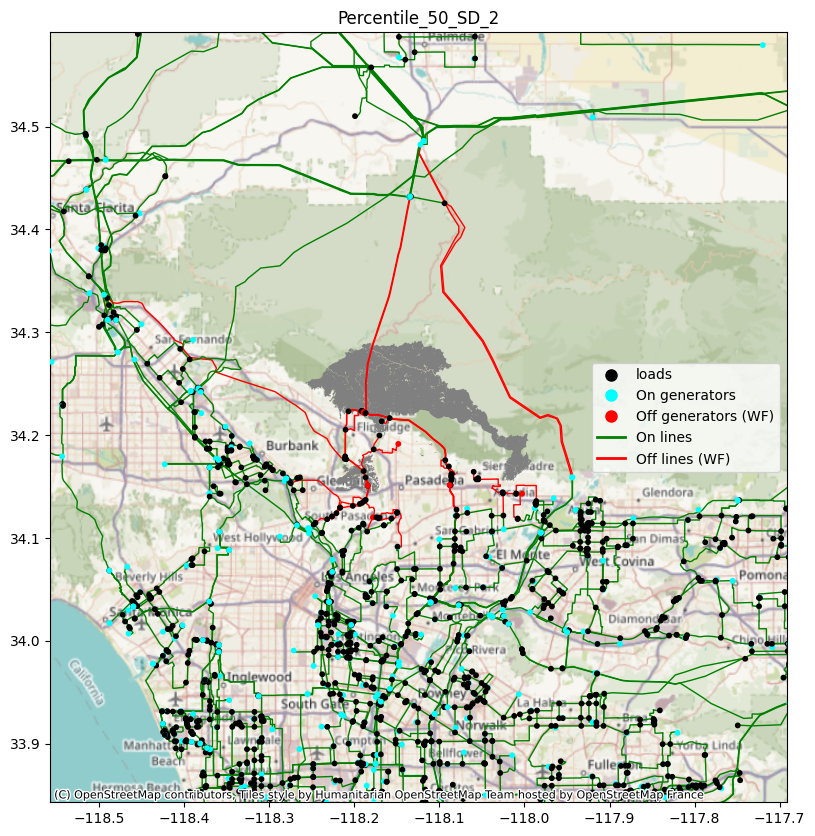

In [8]:

Make_off_info_plot(CATS_lines_dir, CATS_buses_dir, CATS_gens_dir, WF_data_gdfs, WF_lons, WF_lats, out_gen_indixs, WF_lines_indexs, con_names)


## Example two: Using json data

In [9]:
# The data in this directory are shp type. The shp type data have percentiles.
WF_dir = "./wildfires/Monument"

# The file name for the con file
con_filename = "case_Monument.con"

# Extract the type of data and information about the data.
# If the data is type json, then it give give the file names.
# If the data is type shp, then it will give the different percentiles
WF_file_type, WF_dir_info = extract_WF_dir_info(WF_dir)

The different json files:
['Monument_wildfire_data.json']


To create the con file use function: 
 create_WF_con_file_json


### Show what happens when we use the wrong function for creating the con file

In [10]:
WF_data_gdfs, WF_lons, WF_lats, out_gen_indixs, WF_lines_indexs, con_names = create_WF_con_file_shp(WF_dir, CATS_lines_dir, CATS_lines_circuits_dir, CATS_gens_dir, CATS_transformer_dir, "./", SD, percentiles, WF_file_type, WF_dir_info, con_filename = con_filename)


ValueError: The type of data given was .json instead of .shp. Use the following function for this data: create_WF_con_file_json 

### Using the correct function for creating the con file

In [11]:
WF_data_gdfs, WF_lons, WF_lats, out_gen_indixs, WF_lines_indexs, con_names = create_WF_con_file_json(WF_dir, CATS_lines_dir, CATS_lines_circuits_dir, CATS_gens_dir, CATS_transformer_dir, "./", SD, WF_file_type, WF_dir_info, con_filename = con_filename)

The off information due to the wildfire by congiven contingency:
Contingency: Monument_wildfire_data with SD = 2
Number of off lines: 4
Number of off transformers: 0
Number of off generator buses: 0

Finished creating /case_Monument.con


### Visualize the off information for the different percentiles

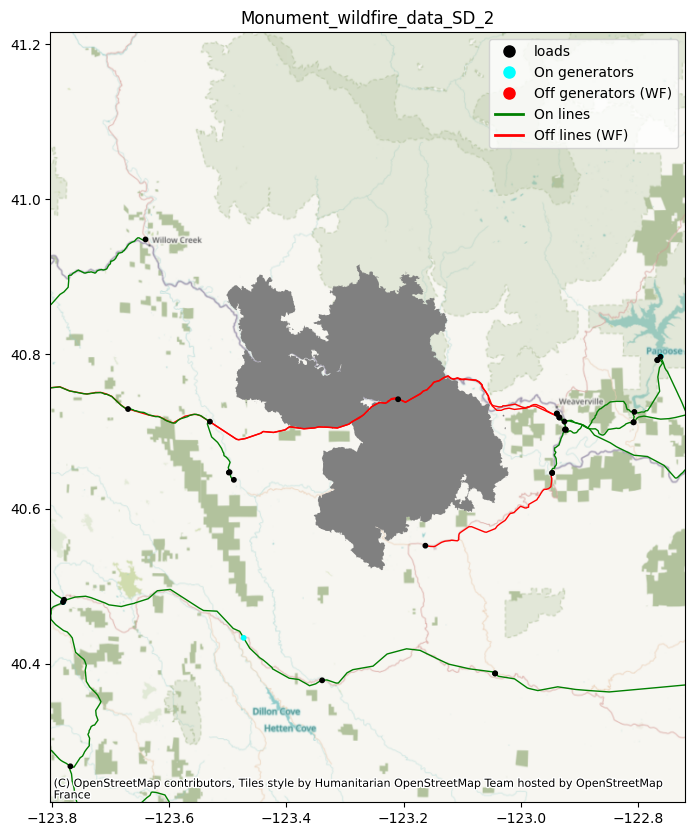

In [12]:
Make_off_info_plot(CATS_lines_dir, CATS_buses_dir, CATS_gens_dir, WF_data_gdfs, WF_lons, WF_lats, out_gen_indixs, WF_lines_indexs, con_names)